## 1. Introduction to resampling methods
`Resampling methods` - an extremely useful class of statistical data analysis techniques which are closely related to the concept of statistical simulation. They have wide applications in areas like model validation, uncertainty estimation and significance testing.

The underlying concept is that you simulate multiple instances of your dataset by resampling it. Let's look at how this is done in practice.
### 1.1. Theorictics
#### Resampling workflow
- In a typical resampling workflow, we start with a dataset. We then apply a resampling method to create a new dataset. We then analyze this dataset to get an estimate for some quantity of interest. We then repeat this process multiple times to get multiple values for that estimator or quantity of interest. 
- And it's as simple as that! No complicated statistical formulae to remember. In general, this simple workflow is how we use resampling methods for data analysis. Let's dig into some advantages and drawbacks.

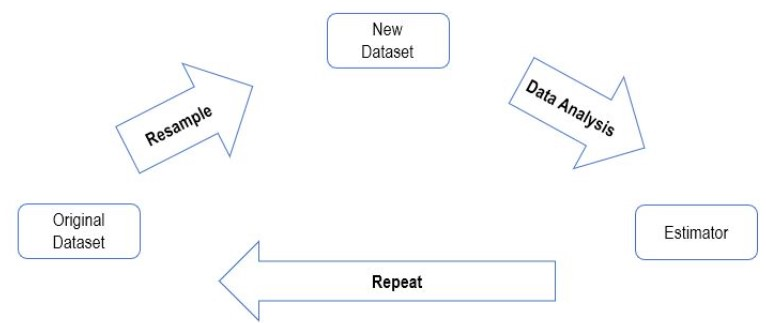

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

#### Why resample?
At a very basic level, resampling methods are quite attractive due to their simplicity. They are conceptually quite simple to implement and are applicable to complex estimators. 

For example, there's a statistical formula for estimating the confidence interval of a population mean, but how about the confidence interval for the 35th percentile of the population distribution? 
>- Resampling methods easily allow such estimations. In general, resampling methods don't make any strict assumptions regarding the distribution of the data. 
>- The drawback of using resampling methods, of course, is that they tend to be computationally expensive.
>- However, with the advent of more powerful computers, this has become less of an issue in recent years. Let's look at the three major types of resampling methods.

#### Types of resampling methods
Generally speaking, there are three broad types of resampling methods.
>- **Bootstrap resampling** is the most common type of resampling method. Here we sample from the dataset repeatedly but with replacement.
>- **Jackknife resampling** is very similar to bootstrapping, except that there is no random sampling. Instead, one or more observations from the original dataset are systematically excluded in creating new datasets. Jackknife resampling methods are quite useful for estimating the bias and variance of estimators. Although jackknife methods were developed before bootstrapping, they can be seen as a linear approximation of bootstrapping. 
>- Finally, we have **permutation testing**, which involves switching the labels in the dataset.

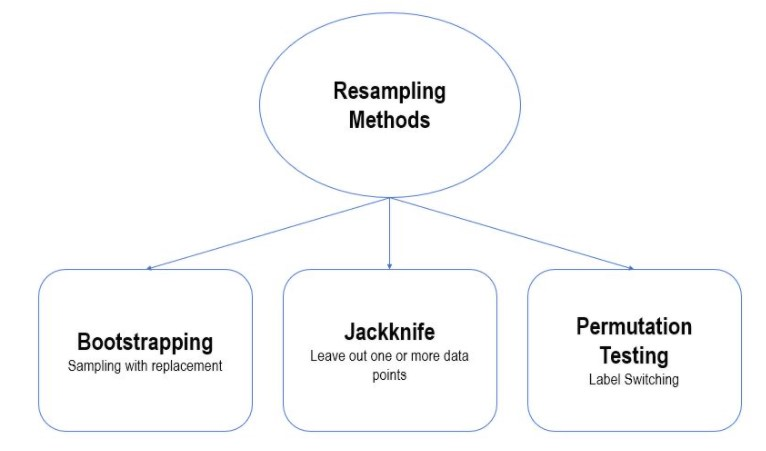

In [2]:
## Hình minh họa Image(fig1, height, width)

### 1.2. PRACTICES
#### Exercise 1.2.1. `np.random.choice()`
In this example, you will review the [np.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) function that you've already seen in the previous chapters. You are given multiple variations of `np.random.choice()` for sampling from arrays. Look at each variation carefully and use the console to test out the options. 

*`Select the option that could generate`* `['a', 'c', 'c']` *`as an output.`*

**Possible Answers**
>- A. `np.random.choice(['a', 'b', 'c'], size=3, replace=False)`
>- B. `np.random.choice(['a', 'b', 'c', 'd', 'e'], size=5, replace=True)[:3]`
>- C. `np.random.choice(['a', 'b', 'c', 'd', 'e'], size=5, replace=False)[:3]`
>- D. `np.random.choice(['a', 'b'], size=3, replace=True)`

#### SOLTION
>- A and C. `"replace = False"` is incorrect.
>- **B. Correct!!**
>- D. We expect the element `'c'` is in the variation but we got `['a', 'b']`.

#### Exercise 1.2.2. Probability example
In this exercise, we will review the difference between sampling with and without replacement. We will calculate the probability of an event using simulation, but vary our sampling method to see how it impacts probability.

>- Consider a bowl filled with colored candies - `3 blue`, `2 green`, and `5 yellow`. 
>- Draw three candies, one at a time, with replacement and without replacement. You want to calculate the probability that all *`three candies are yellow`*.
#### SOLUTION.

In [3]:
# import numpy alias np
import numpy as np

# Set up the bowl
success_rep, success_no_rep, sims = 0, 0, 10000
bowl = list('b'*3 + 'g'*2 + 'y'*5)

# Draw a sample of three candies with replacement
for i in range(sims):
    
    # Sample with and without replacement & increment success counters
    sample_rep = np.random.choice(bowl, size=3, replace=True)
    sample_no_rep = np.random.choice(bowl, size=3, replace=False)
    
    # For the sample with replacement, if there are no 'b' or 'g' candies in sample_rep
    if ('b' not in sample_rep) & ('g' not in sample_rep) : 
        success_rep += 1
    if ('b' not in sample_no_rep) & ('g' not in sample_no_rep) : 
        success_no_rep += 1

# Calculate probabilities
prob_with_replacement = success_rep/sims
prob_without_replacement = success_no_rep/sims
print("Probability with replacement = {}, without replacement = {}".format(prob_with_replacement, prob_without_replacement))

Probability with replacement = 0.1288, without replacement = 0.0865


## 2. Bootstrapping
Now let's dive deeper into the first and probably most popular type of resampling method called bootstrapping. The name bootstrapping basically refers to the fact that we use the existing dataset to simulate multiple different datasets. Let's try to understand bootstrapping with an example.
### 2.1. Theorictic
#### Easter eggs
Suppose you've received a large shipment of [Easter eggs](https://en.wikipedia.org/wiki/Easter_egg) and are interested in determining the average weight of each egg for quality control. 
>- You have access to a small sample of 10 eggs. You weigh these eggs and find 4 that weigh 20g, 3 that weigh 70g and 3 others weighing 50g, 90g and 80g respectively.

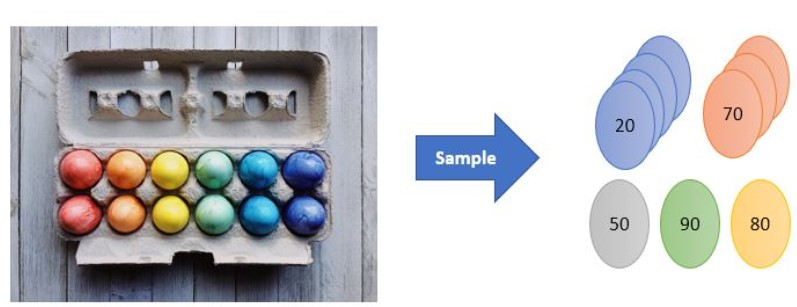

In [4]:
## Hình minh họa Image(fig1, height, width)

>- From this sample, you can easily calculate the `mean of 51`, `standard deviation of 27`, `standard error of 8.53` and then multiply this standard error by 1.96 to get the `95% confidence interval` between `34.27` and `67.73`. 
>- This gives us what we want, doesn't it? We went from a sample distribution to a population distribution. However, there are hidden assumptions in this calculation.
>- First of all, we *`assumed that the distribution of weights is normal`*. 

In addition, we assumed that the confidence interval was symmetric. Both of these might not be reasonable assumptions. So what do we do?

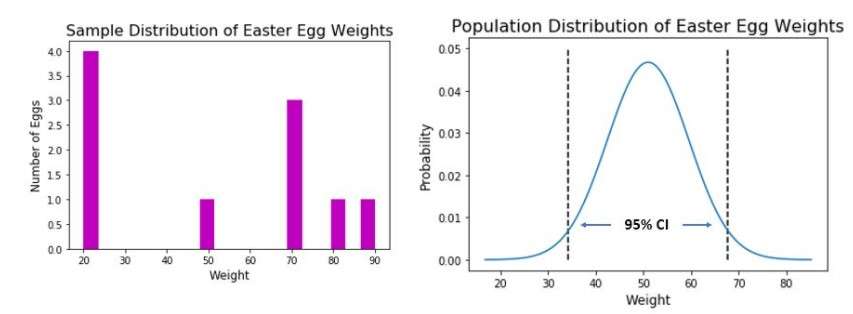

In [5]:
## Hình minh họa Image(fig1, height, width)

#### Bootstrapping Easter eggs
>- One approach is to take a bootstrapped sample by *`sampling with replacement from the original sample`*. In our case, this means that each of the `10` eggs have an equal probability of being picked. 
>- And since it `with replacement`, each egg has an equal probability of being picked subsequently as well. Here are some bootstrapped samples drawn from the `original sample`.
>- Notice how some egg weights appear more often that they do in the original sample. After drawing multiple bootstrap samples, we can calculate the mean weight for each of these samples.

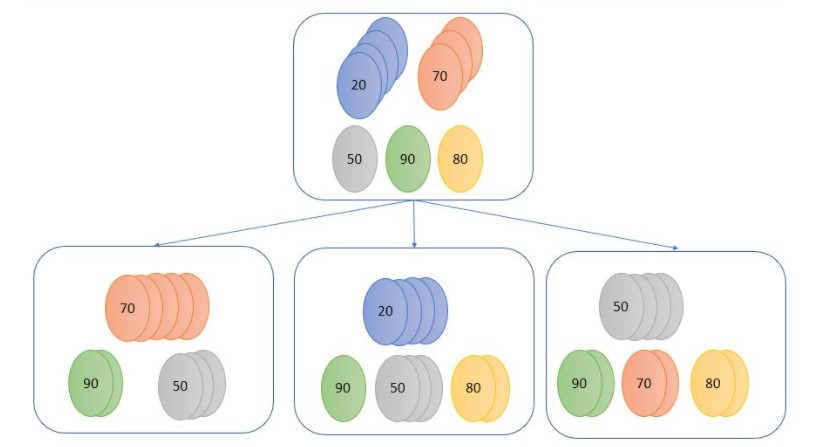

In [6]:
## Hình minh họa Image(fig1, height, width)

#### Bootstrapped distribution
>- Using `5000 iterations`, I get a mean weight of `50.8g` with a `95%` confidence interval between `35` and `67.03`. 
>- Notice that the `CI (confidence interval)` is not symmetric. Although this result isn't hugely different from the original calculation, it does serve to illustrate the power of the bootstrap.
>- One thing to keep in mind is that the reliability of the bootstrap is dependent on the original sample being a reasonable representation of the population.

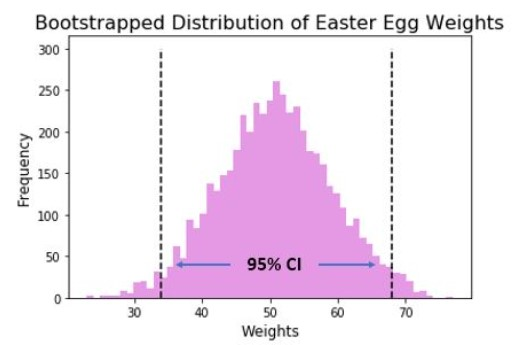

In [7]:
## Hình minh họa Image(fig1, height, width)

#### Bootstrap - Good to know
>- As a [rule of thumb](https://stats.stackexchange.com/questions/86040/rule-of-thumb-for-number-of-bootstrap-samples#:~:text=10%2C000%20seems%20to%20be%20a,about%2095%25%20of%20the%20time.), be sure to **run at least `5-10K iterations`** with the number of observations at least equal to the number of observations in the original sample. 
>- Another thing to keep in mind is that bootstrapping is a random simulation. This means that **the answer will be an approximation** and **will vary slightly every time to run the simulation**.
>- One word of caution is that some bootstrapped statistics, especially those **concerning dispersion of the data like standard deviation tend to be inherently biased**.

But there are procedures like balanced bootstrap that help correct this bias. I encourage you to look these up as you get more familiar with bootstrapping.

### 2.2. PRACTICES
#### Exercise 2.2.1. Running a simple bootstrap
Welcome to the first exercise in the bootstrapping section. We will work through an example where we learn to run a `simple bootstrap`. As we saw in the video, the main idea behind bootstrapping is sampling with replacement.

Suppose you own a factory that produces wrenches. You want to be able to characterize the average length of the wrenches and ensure that they meet some specifications. Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. However, you have access to a representative sample of 100 wrenches. Let's use bootstrapping to get the 95% `confidence interval (CI)` for the average lengths.

#### SOLUTION.
**Step 1.** Generate the list of `wrench_lengths`, which has 100 observed lengths of wrenches and supposed that they distributed w.r.t the mixture Gaussian $\mathcal{N}(9, 1)$ and $\mathcal{N}(11, 1)$

In [8]:
wrench_lengths = 0.6*np.random.normal(9, 1.1, 100) + 0.4*np.random.normal(11, 1.1, 100)

**Step 2.** Generate `boostrap_sample` then calculate 95% confidence interval

In [9]:
# Draw some random sample with replacement and append mean to mean_lengths.
mean_lengths, sims = [], 1000
for i in range(sims):
    temp_sample = np.random.choice(wrench_lengths, 
                                   replace = True, size = len(wrench_lengths))
    sample_mean = np.mean(temp_sample)
    mean_lengths.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 10.026222729736922, 95% CI = [ 9.79181957 10.24524299]


#### Exercise 2.2.2.  Non-standard estimators
In the last exercise, you ran a simple bootstrap that we will now modify for more complicated estimators.

Suppose you are studying the health of students. You are given the height and weight of 1000 students and are interested in the median height as well as the correlation between height and weight and the associated 95% CI for these quantities. Let's use bootstrapping.

#### SOLUTION.
**Step 1.** Loading the `pandas DataFrame` alias `df` with the heights and weights of the first 1000 students.

In [10]:
import pandas as pd
df = pd.read_csv(r'../input/dataset/weight-height.csv')
df = df.iloc[:1000, [1,2]]
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


**Step 2.**  Using this, calculate the 95% CI for both the median height as well as the correlation between height and weight.

In [11]:
# Sample with replacement and calculate quantities of interest
sims, data_size, height_medians, hw_corr = 1000, df.shape[0], [], []
for i in range(sims):
    tmp_df = df.sample(n=data_size, replace=True)
    height_medians.append(tmp_df['Height'].median())
    hw_corr.append(tmp_df.Weight.corr(tmp_df.Height))

# Calculate confidence intervals
height_median_ci = np.percentile(height_medians, [2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr, [2.5, 97.5])
print("Height Median CI = {} \nHeight Weight Correlation CI = {}".format( height_median_ci, height_weight_corr_ci))

Height Median CI = [68.73150731 69.18569561] 
Height Weight Correlation CI = [0.82679293 0.86105537]


#### Exercise 2.2.3. Bootstrapping regression
Now let's see how bootstrapping works with regression. Bootstrapping helps estimate the uncertainty of `non-standard estimators`. Consider the  statistic associated with a regression. When you run a `simple least squares regression`, you get a value for $R^2$. But let's see how can we get a `95% CI` for $R^2$.

We've already fit this regression with `statsmodels (sm)` using:

        reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()
#### SOLUTION.
**Step 1.** Generate dataframe

In [12]:
df = pd.DataFrame({'y': np.random.normal(1.5, 0.35, 1000),
                   'Intercept': 1000*[1],
                   'X1': np.random.uniform(0.0001, 0.999, 1000),
                   'X2': np.random.uniform(0.005, 0.998, 1000)})
df.head()

,y,Intercept,X1,X2
0,1.271951,1,0.973047,0.654396
1,1.876696,1,0.169051,0.747841
2,1.625580,1,0.187538,0.525029
3,1.780194,1,0.003516,0.459864
4,1.335423,1,0.727436,0.932959


**Step 2.** Examine the result using `reg_fit.summary()` to find that . Use bootstrapping to calculate the 95% CI.

In [13]:
import statsmodels.api as sm

rsquared_boot, coefs_boot, sims = [], [], 1000
reg_fit = sm.OLS(df['y'], df.iloc[:,1:]).fit()

# Run 1K iterations
for i in range(sims):
    # First create a bootstrap sample with replacement with n=df.shape[0]
    bootstrap = df.sample(n=df.shape[0], replace=True)
    # Fit the regression and append the r square to rsquared_boot
    rsquared_boot.append(sm.OLS(bootstrap['y'],bootstrap.iloc[:,1:]).fit().rsquared)

# Calculate 95% CI on rsquared_boot
r_sq_95_ci = np.percentile(rsquared_boot, [2.5, 97.5])
print("R Squared 95% CI = {}".format(r_sq_95_ci))

R Squared 95% CI = [0.00027092 0.01771821]


## 3. Jackknife resampling
Next we turn our attention to jackknife resampling. The jackknife estimation process was developed before bootstrapping but is quite similar. John Tukey proposed the name `jackknife` because he saw this procedure as a quick tool that could be applied to a variety of problems. 
>- It is particularly useful when the underlying distribution of the data is unknown. 
>- Just like bootstrapping, you create multiple samples from the original dataset and calculate your statistic for each of the samples.

What differs is how these samples are created. To better understand this resampling process, let's return to the Easter eggs example.
### 3.1. Theorictic.
#### Easter eggs problem
Let's recollect the easter eggs example. You've received a large shipment of easter eggs and are interested in determining the average weight of each egg for quality control. 
>- You have access to a small sample of 10 eggs. You weigh these eggs and find 4 that weigh 20g, 3 that weigh 70g and 3 others weighing 50g, 90g and 80g respectively.
>- You can easily calculate the mean of 51, standard deviation of 27, standard error of 8.53 and then multiply this standard error by 1.96 to get the 95% confidence interval between 34.27 and 67.73. 

This time, let's see how jackknife resampling helps us attack this problem from a slightly different angle.
#### Jackknifing Easter eggs
Our overall approach is very similar to that in bootstrap sampling - we generate multiple datasets, calculate the quantity of interest in each sample, and then aggregate those to get an overall estimate.
>- While in bootstrapping we used sampling with replacement, here we use leave one out resampling. Consider this figure with three possible samples drawn from the original sample.
>- The first one has 9 eggs with the 50g egg removed, the second one has the 90g egg removed while the third one leaves out the 80g egg. 
>- This process is repeated till we have every sample where one egg is left out.

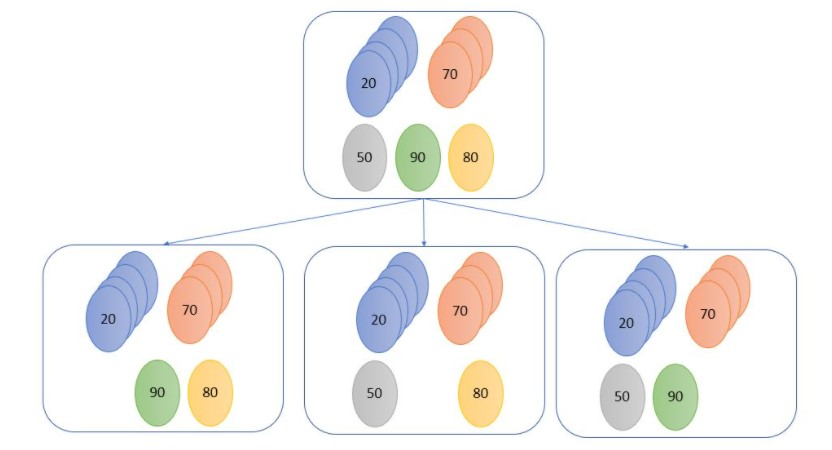

In [14]:
## Hình minh họa Image(fig1, height, width)

#### Jackknife estimate
Although this slide looks math heavy, it's actually very straightforward. 
>- The first equation 
$$ \displaystyle \hat{\theta}_{\text{jack-knife}} = \dfrac{1}{n} \sum_{i=1}^n \hat{\theta}_i $$
basically tells us that theta jackknife, the jackknife estimate of your quantity of interest, is the mean of the values you get from each of the jackknife samples where you leave out one observation. 
>- The variance of the jackknife estimate 
$$ \displaystyle \text{Var} \hat{\theta}_{\text{jack-knife}} = \dfrac{n-1}{n} \sum_{i=1}^n \left( \hat{\theta}_i - \hat{\theta}_{\text{jack-knife}} \right)^2, $$
looks very much like the variance of the values of the quantity from each jackknife sample, expect we have an $n - 1$ term in the numerator. Without going into the math behind it, we mainly need it because each of the jackknife samples only has $n-1$ observations, so this term helps correct for that bias introduced.

(where $\hat{\theta}_{\text{jack-knife}}:$ `Jack-knife Estimate` and $\hat{\theta}_i: $ Estimate for each `jack-knife sample`)

### 3.2. PRACTICES
#### Exercise 3.2.1. Basic jackknife estimation - mean
`Jackknife resampling` is an older procedure, which isn't used as often compared as `bootstrapping`. However, it's still useful to know how to run a basic jackknife estimation procedure.

In this first exercise, we will calculate the jackknife estimate for the mean. Let's return to the wrench factory.
>- You own a wrench factory and want to measure the average length of the wrenches to ensure that they meet some specifications. 
>- Your factory produces thousands of wrenches every day, but it's infeasible to measure the length of each wrench. 
>- However, you have access to a representative sample of 100 wrenches. 

Let's use `jackknife estimation` to get the `average lengths`.
#### SOLUTION.

In [15]:
# Leave one observation out from wrench_lengths to get the jackknife sample and store the mean length
mean_lengths, n = [], len(wrench_lengths)
index = np.arange(n)

for i in range(n):
    jk_sample = wrench_lengths[index != i]  # Remove the element i'th from your sample
    mean_lengths.append(np.mean(jk_sample)) # Append the mean of the jack-knife sample

# The jackknife estimate is the mean of the mean lengths from each sample
mean_lengths_jk = np.mean(np.array(mean_lengths))
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))

Jackknife estimate of the mean = 10.02710907349036


#### Exercise 3.2.2. Jackknife confidence interval for the median
In this exercise, we will calculate the `jackknife 95% CI` for a `non-standard estimator`. Here, we will look at the median. Keep in mind that the variance of a jackknife estimator is $n-1$ times the variance of the individual jackknife sample estimates where n is the number of observations in the original sample.

Returning to the wrench factory, you are now interested in estimating the median length of the wrenches along with a 95% CI to ensure that the wrenches are within tolerance.

Let's revisit the code from the previous exercise, but this time in the context of median lengths. By the end of this exercise, you will have a much better idea of how to use jackknife resampling to calculate confidence intervals for non-standard estimators.

In [16]:
# Leave one observation out to get the jackknife sample and store the median length
median_lengths = []
for i in range(n):
    jk_sample = wrench_lengths[index != i]
    median_lengths.append(np.median(jk_sample))

median_lengths = np.array(median_lengths)

# Calculate jackknife estimate and it's variance
jk_median_length = np.mean(median_lengths)
jk_var = (n-1)*np.var(median_lengths)

# Assuming normality, calculate lower and upper 95% confidence intervals
jk_lower_ci = jk_median_length - 1.96*np.sqrt(jk_var)
jk_upper_ci = jk_median_length + 1.96*np.sqrt(jk_var)
print("Jackknife 95% CI lower = {}, upper = {}".format(jk_lower_ci, jk_upper_ci))

Jackknife 95% CI lower = 9.138592467547202, upper = 10.754868069037098


## 4. Permutation testing
The theory behind permutation testing is beyond the scope of this course, but at a very high level, permutation testing tries to obtain the distribution of the test statistic under the null without making any strong assumptions about the data as opposed to classical tests like the t-test and `chi-squared` test which rely on probability distributions.
### 4.1. Theorictic
#### Steps involved
A permutation test is a kind of non-parametric test, which only assumes that it is possible for all treatment groups to be very similar. Consider data from two groups $A$ and $B$. A permutation test typically involves the following steps.
>- First we determine the test statistic - this could be anything, but usually we'd like to know the difference in means of the two groups. 
>- Next, the observations are pooled and a new dataset is generated for every possible permutation of labels in groups $A$ and $B$. In practice, it gets restrictive to look at every single permutation, so we use a random sample of the possible permutations.

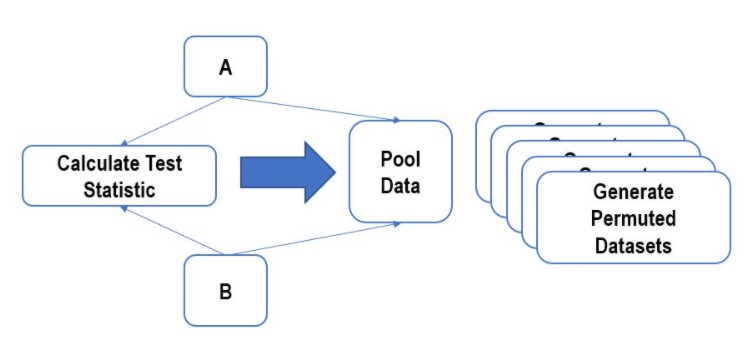

In [17]:
## Hình minh họa Image(fig1, height, width)

>- Calculate the difference in means for each of these datasets. This set of calculated differences is the exact distribution of the difference in means under the null hypothesis where the group labels are irrelevant.
>-  As a final step, we can check to see where our test statistic falls in this distribution. For instance, if the test statistic falls within the 95% confidence interval, we can say that there's no real difference between groups $A$ and $B$. You could even use this distribution to obtain a $p-$`value` if you please. Thus, permutation tests are quite simple and intuitive.

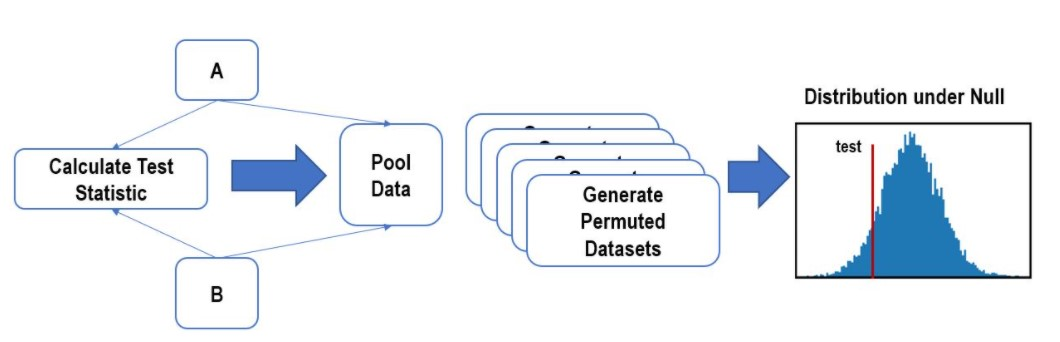

In [18]:
## Hình minh họa Image(fig1, height, width)

#### Discussion
There are multiple advantages of permutation testing. 
>- First of all, they are **remarkably flexible for even complicated test statistics**. For instance, you could calculate the null distribution of the ratio of the maximum value to the minimum value if you wanted.
>- Additionally, you're not making any distributional assumptions (**No strict assumption**). 
>- This makes permutation testing **quite widely applicable**. 

The `drawbacks`, 
>- However, are that they tend to get **computationally quite expensive**, especially as the size of the data gets bigger. Practically speaking, only a random sample of all possible permutations is used. 
>- Furthermore, you will need to write **custom code to compute the test statistic and perform this test for various scenarios**. *`It's not as easy as running the t-test`*. In my opinion, this is a very powerful statistical tool to have in your back pocket.

#### Donation website
In the next three exercises, we will code up a permutation test from scratch. 
>- Suppose that you are in charge of a non-profit and are testing two different web page designs for your donation website.
>- You are interested in seeing whether there is any difference in the donations received from each of these designs - design $A$ and design $B$. You have data for donations from each of these website designs.

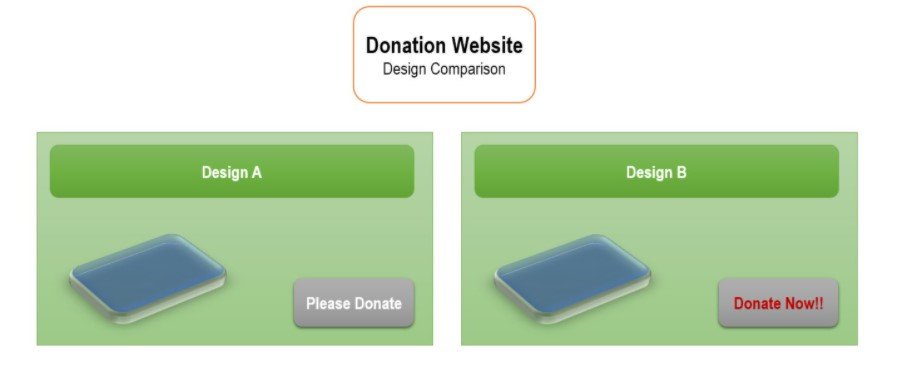

In [19]:
## Hình minh họa Image(fig1, height, width)

### 4.2. PRACTICES
#### Exercise 4.2.1. Generating a single permutation
In the next few exercises, we will run a significance test using permutation testing. 

As discussed in the theory, we want to see if there's any difference in the donations generated by the two designs - $A$ and $B$. 

Suppose that you have been running both the versions for a few days and have generated `500` donations on $A$ and `700` donations on $B$, stored in the variables `donations_A` and `donations_B`.

>- We first need to generate a `null distribution` for the difference in means. 
>- We will achieve this by generating `multiple permutations` of the dataset and calculating the difference in means for each case.

Now, let's generate one permutation and calculate the difference in means for the permuted dataset.
#### SOLUTION
**Step 1.** Loading `donation` dataset

In [20]:
donations_A = np.random.normal(6, 6, 500)
donations_B = np.random.normal(5, 5, 700)

**Step 2.** Generate permutation & calculate difference in means

In [21]:
# Concatenate the two arrays donations_A and donations_B into data
len_A, len_B = len(donations_A), len(donations_B)
data = np.concatenate([donations_A, donations_B])

# Get a single permutation of the concatenated length
perm = np.random.permutation(len(donations_A) + len(donations_B))

# Calculate the permutated datasets and difference in means
permuted_A = data[perm[:len(donations_A)]]
permuted_B = data[perm[len(donations_A):]]
diff_in_means = np.mean(permuted_A) - np.mean(permuted_B)
print("Difference in the permuted mean values = {}.".format(diff_in_means))

Difference in the permuted mean values = 0.2672472925401408.


#### Exercise 4.2.2. Hypothesis testing - Difference of means
We want to test the hypothesis that there is a difference in the average donations received from $A$ and $B$. Previously, you learned how to generate one permutation of the data. Now, we will generate a null distribution of the difference in means and then calculate the p-value.

>- For the null distribution, we first generate multiple permuted datasets and store the difference in means for each case.
>- We then calculate the test statistic as the difference in means with the original dataset.
>- Finally, we approximate the `p-value` by calculating twice the fraction of cases where the difference is greater than or equal to the absolute value of the test statistic (`2-sided hypothesis`).

A `p-value` of less than say 0.05 could then determine statistical significance.
#### SOLUTION

In [22]:
reps = 1000

# Generate permutations equal to the number of repetitions
perm = np.array([np.random.permutation(len(donations_A) + len(donations_B)) for i in range(reps)])
permuted_A_datasets = data[perm[:, :len(donations_A)]]
permuted_B_datasets = data[perm[:, len(donations_A):]]

# Calculate the difference in means for each of the datasets
samples = np.mean(permuted_A_datasets, axis=1) - np.mean(permuted_B_datasets, axis=1)

# Calculate the test statistic and p-value
test_stat = np.mean(donations_A) - np.mean(donations_B)
p_val = 2*np.sum(samples >= np.abs(test_stat))/reps
print("p-value = {}".format(p_val))

p-value = 0.0


#### Exercise 4.2.3. Hypothesis testing - Non-standard statistics
In the previous two exercises, we ran a permutation test for the difference in mean values. Now let's look at non-standard statistics.

>- Suppose that you're interested in understanding the distribution of the donations received from websites $A$ and $B$. 
>- For this, you want to see if there's a statistically significant difference in the median and the 80th percentile of the donations. 
>- Permutation testing gives you a wonderfully flexible framework for attacking such problems.

Let's go through running a test to see if there's a difference in the median and the 80th percentile of the distribution of donations. As before, you're given the donations from the websites $A$ and $B$ in the variables `donations_A` and `donations_B` respectively.
#### SOLUTION.

In [23]:
# Calculate the difference in 80th percentile and median for each of the permuted datasets (A and B)
samples_percentile = np.percentile(permuted_A_datasets, 80, axis=1) - np.percentile(permuted_B_datasets, 80, axis=1)
samples_median = np.median(permuted_A_datasets, axis=1) - np.median(permuted_B_datasets, axis=1)

# Calculate the test statistic from the original dataset and corresponding p-values
test_stat_percentile = np.percentile(donations_A, 80) - np.percentile(donations_B, 80)
test_stat_median = np.median(donations_A) - np.median(donations_B)

# Calculate p_val_median as 2 x fraction of cases where sample median is greater than or equal to the median test statistic.
p_val_percentile = 2*np.sum(samples_percentile >= np.abs(test_stat_percentile))/reps
p_val_median = 2*np.sum(samples_median >= np.abs(test_stat_median))/reps

print("80th Percentile: test statistic = {}, p-value = {}".format(test_stat_percentile, p_val_percentile))
print("Median: test statistic = {}, p-value = {}".format(test_stat_median, p_val_median))

80th Percentile: test statistic = 1.9964300300680193, p-value = 0.0
Median: test statistic = 1.1998038800725448, p-value = 0.002
